#IMPORTS AND LOADING THE DATASET

In [2]:
from sklearn.ensemble import RandomForestRegressor
from google.colab import drive


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.model_selection import train_test_split, cross_validate
import sklearn.metrics
import sklearn.tree

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder




[EN]

Here at this cell, we write the necessary import statements for the project to work properly.

[TUR]

Bu kod hücresinde proje için gerekli olan import argümanlarını yazıyoruz.

In [3]:
drive.mount("/drive/", force_remount=True)


Mounted at /drive/


[EN]

In this cell, we mount our drive to access the CSV file.

[TUR]

Bu hücrede CSV dosyasına erişebilmek için drive'ımızı mountluyoruz.

In [4]:
dataframe=pd.read_csv("/drive/MyDrive/GlobalAIHub/Melbourne_housing_FULL.csv")
dataframe_copy=dataframe.copy()
dataframe_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


[EN]

Here we duplicate our dataframe and look at the first 5 rows of data. The main reason behind this duplication is that when we perform any operation on the dataframe, we might alter the data inside. Since it is perfectly plausible for a need of return to the original dataframe to arise, by duplicating the dataframe, we do not lose any information on the original dataframe.

[TUR]

Burada dataframe'imizin bir kopyasını oluşturuyoruz ve ilk 5 satırlık datayı inceliyoruz. Bu kopyalama sürecinin ana amacıysa dataframe üzerinde herhangi bir operasyon yaptığımız zaman içerideki veriyi değiştirebiliriz. Orijinal dataframe'imize dönmemizi gerektiren bir durumun ortaya çıkması da gayet de imkanlı bir durum olduğundan dolayı bu kopyalama işlemiyle birlikte orijinal dataframe'den bir bilgi kaybı yaşamıyoruz.

# EDA

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

[EN]

Here, we see some information about our dataframe such as RangeIndex, DataColumns, dtypes and memory usage.

[TUR]

Burada dataframe'imiz hakkında RangeIndex, DataColumns, dtypes ve RAM kullanımı gibi bazı bilgileri görüyoruz.

In [6]:
print(f'Shape     : {dataframe_copy.shape}\n'
      f'Size      : {dataframe_copy.size}\n'
      f'Dimension : {dataframe_copy.ndim}')


Shape     : (34857, 21)
Size      : 731997
Dimension : 2


[EN]

Here we print out the Shape, Size and the Dimension properties of our dataframe.

[TUR]

Burada dataframe'imizin Shape, Size ve Dimension özelliklerini yazdırıyoruz.

In [7]:
dataframe.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

[EN]

Here we check how many null cells we have on our dataframe.

[TUR]

Burada dataframe'imizde ne kadar boş hücre olduğunu kontrol ediyoruz.

In [8]:
dataframe_copy.loc[dataframe_copy.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


[EN]

Here we check if there are any duplicates on our dataframe. Now, it is plausible for a duplicate to be not redundant. However, in our case the redundancy is certain beyond doubt.

[TUR]

Burada dataframe'imizde herhangi iki satırdaki verilerin tamamen aynı olup olmadığını kontrol ediyoruz. Her ne kadar iki verinin tamamen aynı olması bazı durumlarda anlamsızlığı gerektirmiyor olsa da bizim senaryomuzdaki aynılıktaki anlamsızlık şüpheye mahal vermeyecek şekilde açık ve net.  

In [9]:
dataframe_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


[EN]

Here, we get a glimpse into our raw data.

[TUR]

Burada ham verimize yüzeyel bir şekilde bakıyoruz.

In [10]:
dataframe_copy.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

[EN]

Here we check how many unique values we have on each of the columns.

[TUR]

Burada her sütunda kaç tane eşsiz değer olduğunu kontrol ediyoruz.

#FEATURE ENGINEERING

In [11]:
dataframe_copy.drop_duplicates(inplace=True)
dataframe_copy

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


[EN]

Here we drop the aforementioned duplicates on grounds of the argument above on redundancy of the data.

[TUR]

Burada daha önceki hücrede bahsetmiş olduğumuz anlamsızlık argümanı doğrultusunda tamamen aynı olan verilerden bir tanesini siliyoruz.  

In [12]:
dataframe_copy.drop(columns=['Bedroom2'], inplace=True)
dataframe_copy

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


[EN]

Here we drop the column 'Bedroom2' from our dataframe since it is heavily correlated (I did a correlation chart without the removal beforehand and the correlation value was 0.95) with another column namely 'Rooms'.

[TUR]

Burada dataframe'imizden 'Bedroom2' adlı sütunu siliyoruz çünkü bu değişken 'Rooms' sütunundaki değişkenle aşırı derecede pozitif korelasyona sahip. (Bu sütunu droplamadan önce yaptığım korelasyon grafiğindeki korelasyon değeri 0.95'ti).

In [13]:
dataframe_copy.dropna(subset=['Price'], inplace=True)
dataframe_copy

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


[EN]

Here we drop all the rows which do not have a value in the column 'Price'.

[TUR]

Burada 'Price' sütununda değer olmayan tüm satırları siliyoruz.

In [14]:
cat_cols=["Suburb", "Type", "Method", "Date", "Regionname", "Bathroom", "Car", "Distance"]
num_cols=["Rooms", "Price", "Landsize", "BuildingArea", "YearBuilt"]

[EN]

Here we statically divide our variables into categorical and numerical ones.

[TUR]

Burada statik bir şekilde değişkenlerimizi kategorik ve nümerik olarak ikiye bölüyoruz.

In [15]:
for column in cat_cols:
  dataframe_copy[column] = dataframe_copy[column].fillna(dataframe_copy[column].mode().iloc[0])

for column in num_cols:
  dataframe_copy[column] = dataframe_copy[column].fillna(dataframe_copy[column].mean())

[EN]

Here we fill the empty values in the categorical columns with the mode of that particular column. We also fill the numerical values with the mean of that particular column.

[TUR]

Burada kategorik sütunlardaki boş değerleri mevzubahis sütunun modu olan değerle dolduruyoruz. Ayrıca nümerik değerleri de mevzubahis sütunun ortalamasıyla dolduruyoruz.

In [16]:
z_scores=pd.DataFrame(zscore(dataframe_copy[num_cols]), columns=num_cols)

threshold=3


outliers = z_scores[(z_scores > threshold).any(axis=1)]
outlier_indices = outliers.index
outlier_values = dataframe_copy.loc[outlier_indices]


outlier_values


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
81,Airport West,11 Harrington Rd,6,h,725000.0,SP,Barry,7/05/2016,13.5,3042.0,3.0,2.0,976.000000,186.000000,1980.000000,Moonee Valley City Council,-37.72390,144.87350,Western Metropolitan,3464.0
166,Albert Park,97 Page St,3,h,3010000.0,S,Greg,18/03/2017,3.3,3206.0,2.0,0.0,147.000000,146.000000,1890.000000,Port Phillip City Council,-37.84730,144.95510,Southern Metropolitan,3280.0
178,Albert Park,115 Page St,4,h,4735000.0,S,Marshall,25/02/2017,3.3,3206.0,2.0,1.0,330.000000,207.000000,1910.000000,Port Phillip City Council,-37.84770,144.95580,Southern Metropolitan,3280.0
182,Albert Park,22 Greig St,3,h,3755000.0,S,Greg,26/07/2016,3.3,3206.0,2.0,2.0,325.000000,156.834586,1966.609153,Port Phillip City Council,-37.84130,144.95000,Southern Metropolitan,3280.0
387,Armadale,11/17 Myamyn St,2,u,3625000.0,S,Jellis,4/06/2016,6.3,3143.0,2.0,2.0,0.000000,156.834586,2006.000000,Stonnington City Council,-37.85550,145.02910,Southern Metropolitan,4836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34455,Malvern East,2 Finch St,5,h,3680000.0,S,Marshall,24/02/2018,8.4,3145.0,3.0,2.0,807.000000,156.834586,1907.000000,Stonnington City Council,-37.87479,145.04290,Southern Metropolitan,8801.0
34494,Middle Park,33 Canterbury Rd,6,h,5575000.0,S,Marshall,24/02/2018,3.0,3206.0,4.0,4.0,420.000000,324.000000,1880.000000,Port Phillip City Council,-37.84535,144.96044,Southern Metropolitan,2019.0
34496,Middle Park,108 Hambleton St,3,h,3750000.0,SA,Greg,24/02/2018,3.0,3206.0,1.0,0.0,284.000000,148.000000,1890.000000,Port Phillip City Council,-37.84794,144.96117,Southern Metropolitan,2019.0
34498,Middle Park,22 McGregor St,3,h,3250000.0,S,Greg,24/02/2018,3.0,3206.0,2.0,1.0,286.000000,233.000000,1900.000000,Port Phillip City Council,-37.85205,144.96481,Southern Metropolitan,2019.0


[EN]

Here, we find the outliers in our dataframe via the z-score and print a seperate dataframe which includes our outliers.

[TUR]

Burada dataframe'imizdeki outlierları z-score yöntemiyle bulup sonrasında da bu değerleri ekrana ayrı bir dataframe olarak yazdırıyoruz.

In [17]:
for cols in num_cols:
  dataframe_copy.drop(dataframe_copy[zscore(dataframe_copy[cols])>threshold].index, inplace=True)

dataframe_copy

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.000000,156.834586,1966.609153,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.000000,79.000000,1900.000000,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.000000,150.000000,1900.000000,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,2.0,1.0,94.000000,156.834586,1966.609153,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,1.0,2.0,120.000000,142.000000,2014.000000,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,1.0,3.0,593.000000,156.834586,1966.609153,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,1.0,98.000000,104.000000,2018.000000,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,1.0,2.0,220.000000,120.000000,2000.000000,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,1.0,2.0,593.488933,156.834586,1966.609153,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


[EN]

Here we drop the outliers from our dataframe.

[TUR]

Burada dataframe'imizden outlierları siliyoruz.

In [18]:
dataframe_copy=dataframe_copy.reset_index(drop=True)
dataframe_copy

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.000000,156.834586,1966.609153,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.000000,79.000000,1900.000000,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.000000,150.000000,1900.000000,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,2.0,1.0,94.000000,156.834586,1966.609153,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,1.0,2.0,120.000000,142.000000,2014.000000,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26427,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,1.0,3.0,593.000000,156.834586,1966.609153,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
26428,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,1.0,98.000000,104.000000,2018.000000,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
26429,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,1.0,2.0,220.000000,120.000000,2000.000000,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
26430,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,1.0,2.0,593.488933,156.834586,1966.609153,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


[EN]

Here we rearrange the indices of our dataframe in order to not get any errors should the need to iterate over the rows of our dataframe arise.

[TUR]

Burada dataframe'imizin indislerini yeniden düzenliyoruz ki eğer dataframe'imizin satırları üzerinde bir iterasyon yapmak zorunda kalırsak bir hatayla karşılaşmak gibi bir durum yaşamayalım.

# DATA VISUALIZATION

In [19]:
room_intervals=[0, 1, 2, 3, 4, 5, np.inf]
landsize_intervals=[-np.inf, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, np.inf]
building_area_interval=[-np.inf, 50, 100, 150, 200, 250, 300, np.inf]
year_built_interval=[-np.inf, 1900, 1925, 1950, 1975, 2000, np.inf]

room_labels=['1', '2', '3', '4', '5', 'More than 5']
landsize_labels=['250 or Smaller', '251-500', '501-750', '751-1000', '1001-1250', '1251-1500', '1501-1750', '1751-2000', 'Larger than 2000']
building_area_labels=['50 or Smaller', '51-100', '101-150', '151-200', '201-250', '251-300', 'Larger than 300']
year_built_labels=['Before 1900', '1900-1925', '1926-1950', '1951-1975', '1976-2000', 'After 2000']

dataframe_copy['RoomsBin']=pd.cut(dataframe_copy['Rooms'], bins=room_intervals)
dataframe_copy['LandSizeBin']=pd.cut(dataframe_copy['Landsize'], bins=landsize_intervals)
dataframe_copy['BuildingAreaBin']=pd.cut(dataframe_copy['BuildingArea'], bins=building_area_interval)
dataframe_copy['YearBuiltBin']=pd.cut(dataframe_copy['YearBuilt'], bins=year_built_interval)



[EN]

Here we first specify the intervals for the variables we want to graph. Then, we create the labels i.e the x-axis for the aforementioned variable. Finally, we add a dummy column to get the division of data into the specified interval.

[TUR]

Burada ilk olarak grafiğe dökmek istediğimiz değişkenler için aralıklarımızı belirliyoruz. Sonrasında da önceki cümlede bahsettiğimiz değişkenler için (yani x ekseni için) label'ları oluşturuyoruz. En nihayetinde de verimizi bizim ayarladığımız aralıklara bölüştürmek için bir kopya sütun yaratıyoruz.

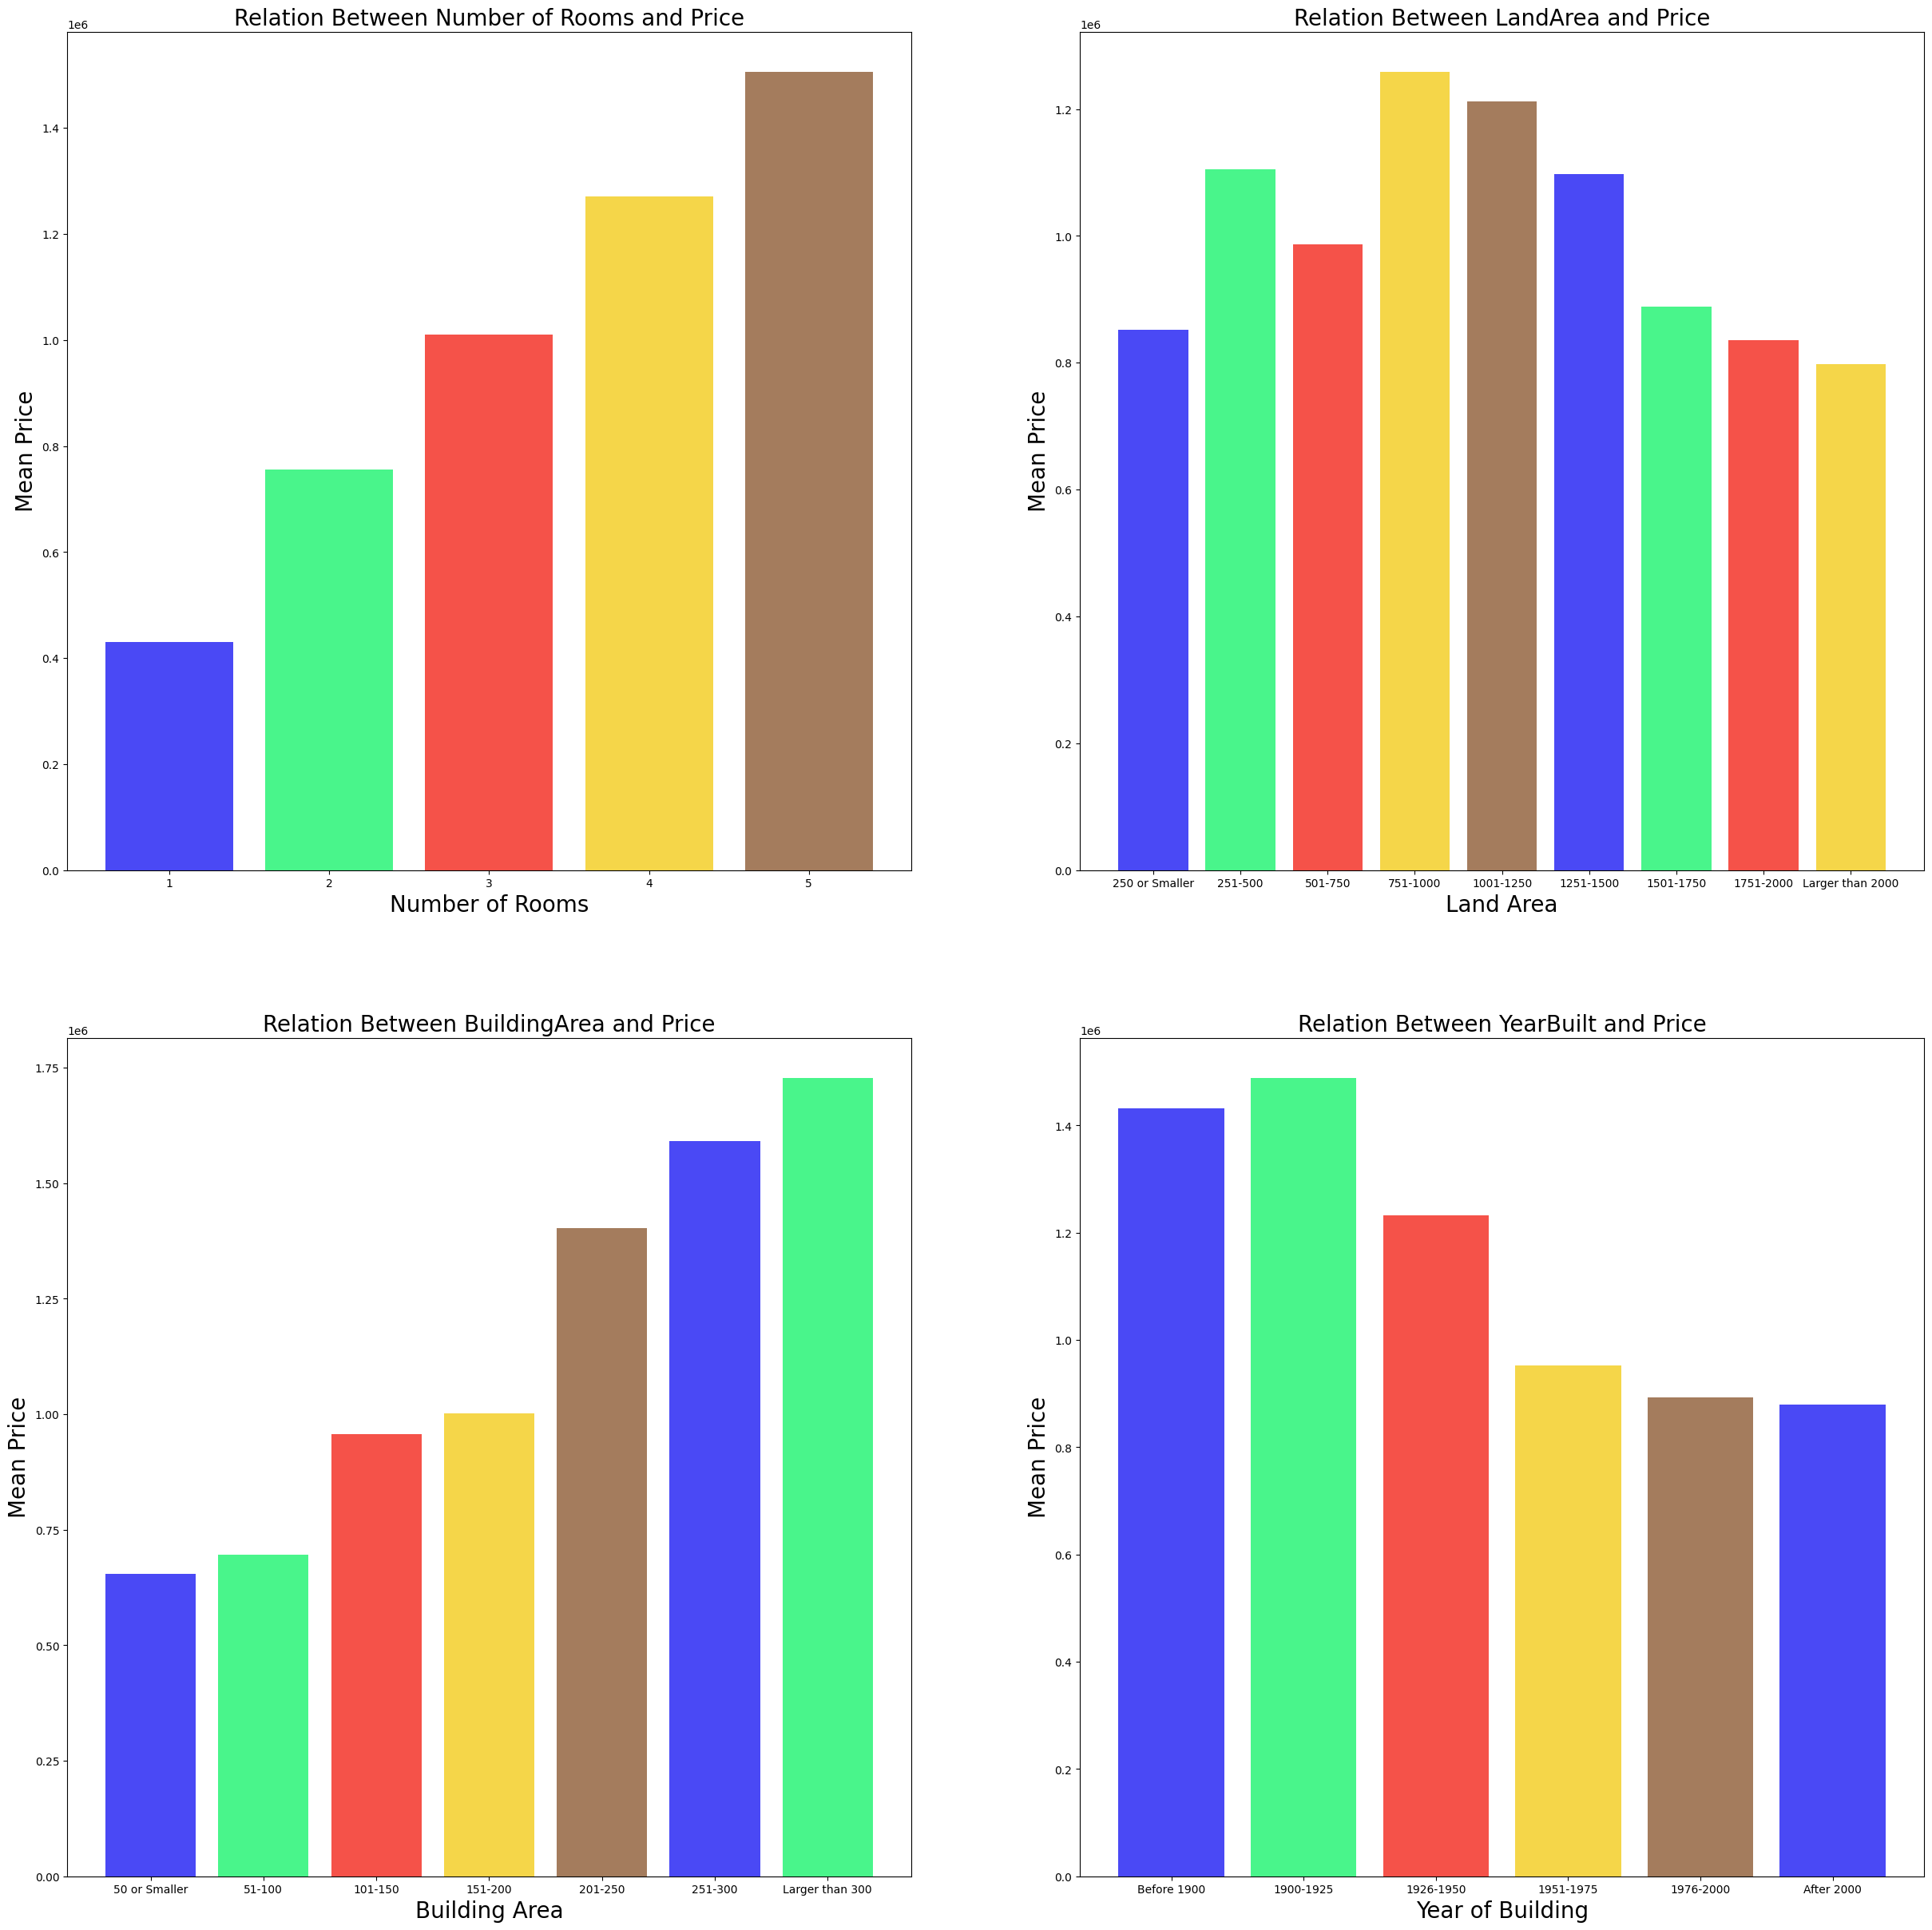

In [20]:
colors=["#4A49F5", "#49F58B", "#F55249", "#F5D649", "#A47C5D" ]



room_y_axis=dataframe_copy.groupby('RoomsBin')['Price'].mean()
landsize_y_axis=dataframe_copy.groupby('LandSizeBin')['Price'].mean()
buildingarea_y_axis=dataframe_copy.groupby('BuildingAreaBin')['Price'].mean()
yearbuilt_y_axis=dataframe_copy.groupby('YearBuiltBin')['Price'].mean()


fig, ((ax11, ax12),(ax21, ax22)) = plt.subplots(nrows=2, ncols=2, figsize=(30,30))


ax11.bar(room_labels, room_y_axis , color=colors)
ax11.set_title('Relation Between Number of Rooms and Price', fontdict={'fontsize': 20})
ax11.set_xlabel('Number of Rooms', fontdict={'fontsize': 20})
ax11.set_ylabel('Mean Price', fontdict={'fontsize': 20})

ax12.bar(landsize_labels, landsize_y_axis , color=colors)
ax12.set_title('Relation Between LandArea and Price', fontdict={'fontsize': 20})
ax12.set_xlabel('Land Area', fontdict={'fontsize': 20})
ax12.set_ylabel('Mean Price', fontdict={'fontsize': 20})

ax21.bar(building_area_labels, buildingarea_y_axis , color=colors)
ax21.set_title('Relation Between BuildingArea and Price', fontdict={'fontsize': 20})
ax21.set_xlabel('Building Area', fontdict={'fontsize': 20})
ax21.set_ylabel('Mean Price', fontdict={'fontsize': 20})

ax22.bar(year_built_labels, yearbuilt_y_axis , color=colors)
ax22.set_title('Relation Between YearBuilt and Price', fontdict={'fontsize': 20})
ax22.set_xlabel('Year of Building', fontdict={'fontsize': 20})
ax22.set_ylabel('Mean Price', fontdict={'fontsize': 20})

plt.show()




[EN]

Here we graph all the numerical values against the mean price.

[TUR]

Burada tüm nümerik değerleri ortalama fiyatla karşılaştıracak şekilde grafiklerimizi oluşturuyoruz.

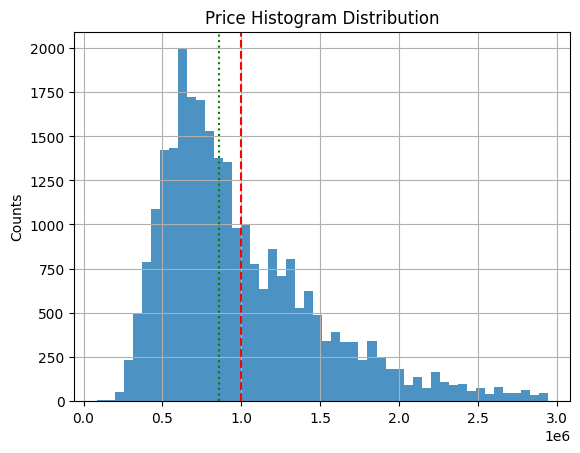

In [21]:
dataframe_copy['Price'].hist(bins=50, label='Price', alpha=0.8)
plt.axvline(np.mean(dataframe_copy['Price']), ls='--', c='r', label="Mean")
plt.axvline(np.median(dataframe_copy['Price']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Price Histogram Distribution");





[EN]

Here we create the price histogram in order to better understand the distribution of it.

[TUR]

Burada fiyat histogramını oluşturarak fiyatın dağılımını daha iyi anlıyoruz.

<ipython-input-22-1da8078e012d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataframe_copy.corr()


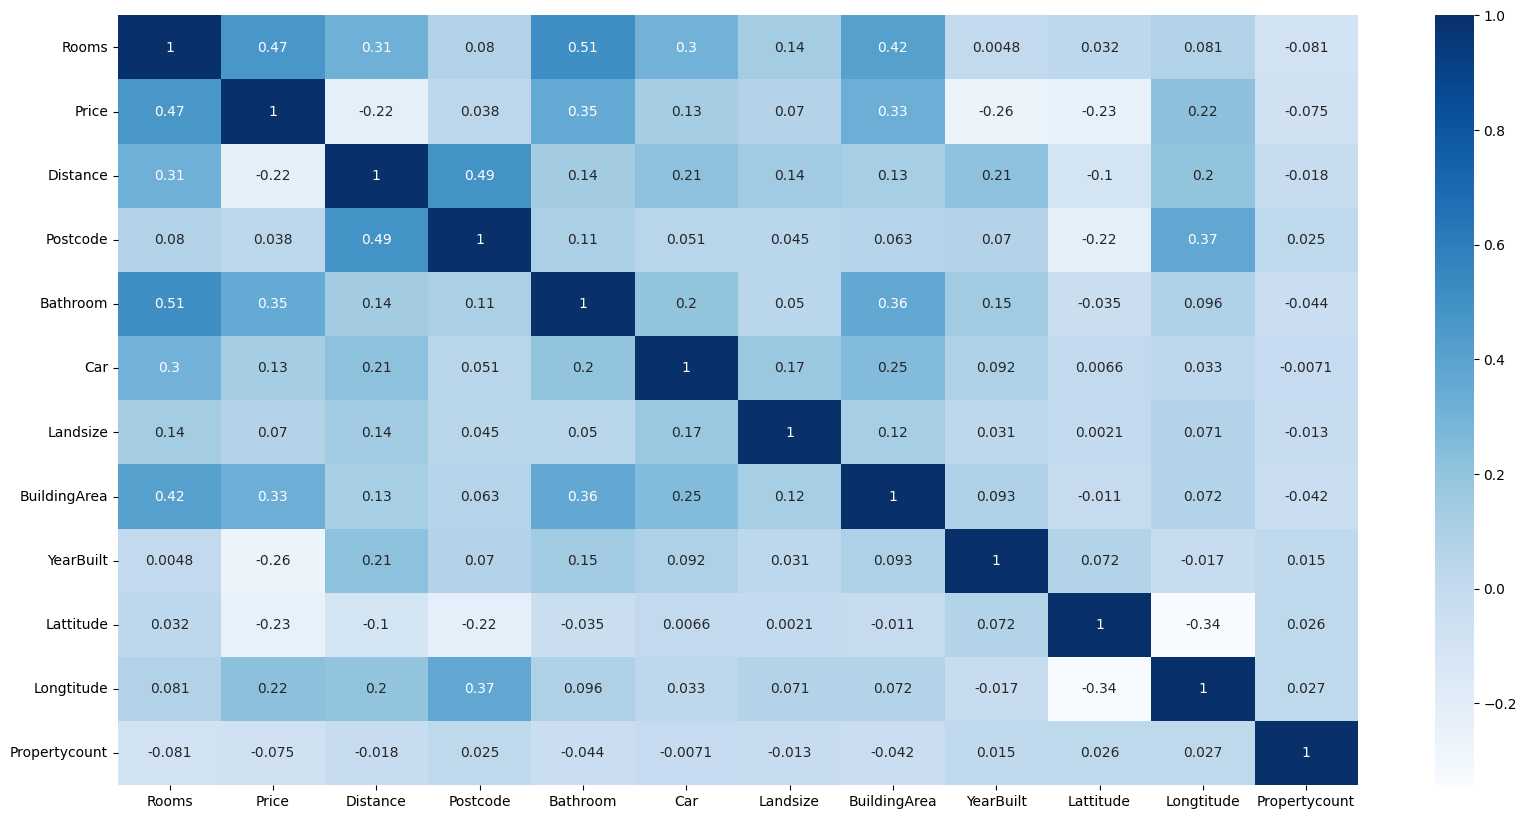

In [22]:


corr = dataframe_copy.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);



[EN]

Here we create the correlation matrix in order to understand which variables tend to depend on each other if such a correlation is meaningfully existent.

[TUR]

Burada korelasyon matrisini yaratmak suretinde sıralı bir şekilde -eğer böyle bir ilişki varsa- hangi iki değişken birbiriyle bağımlılık gösteriyor onu kontrol ediyoruz.

In [23]:
print(pd.concat([dataframe_copy.isnull().sum(), dataframe_copy.isnull().sum()/len(dataframe_copy)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))



                 Number of Missing Values  Ratio of Missing Values
Suburb                                  0                 0.000000
Address                                 0                 0.000000
Rooms                                   0                 0.000000
Type                                    0                 0.000000
Price                                   0                 0.000000
Method                                  0                 0.000000
SellerG                                 0                 0.000000
Date                                    0                 0.000000
Distance                                0                 0.000000
Postcode                                1                 0.003783
Bathroom                                0                 0.000000
Car                                     0                 0.000000
Landsize                                0                 0.000000
BuildingArea                            0                 0.00

[EN]

Here, we again check the missing values in our dataframe.

[TUR]

Burada tekrardan dataframe'imizdeki eksik değerleri kontrol ediyoruz.

In [34]:
label_encoder = LabelEncoder()

one_hot_encoder = OneHotEncoder()


for cat in cat_cols:
  dataframe_copy[f"{cat}_label_encoded"] = label_encoder.fit_transform(dataframe_copy[cat])




#MODEL TRAINING

In [35]:
y = dataframe_copy["Price"]
X = dataframe_copy.drop(['Price', 'RoomsBin', 'LandSizeBin', 'YearBuiltBin', 'BuildingAreaBin', "Address", "SellerG", "CouncilArea", "Date", "Postcode", "Lattitude", "Longtitude", "Propertycount"]+cat_cols, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [37]:


print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))



Shape of x_train is (21145, 12)
Shape of x_test is (5287, 12)
Shape of y_train is (21145,)
Shape of y_test is (5287,)


In [38]:
models = {
'Lasso': {
'model': Lasso()
},
'LinearRegression': {
'model': LinearRegression()
},
'Ridge': {
'model': Ridge()
},
'ElasticNet': {
'model': ElasticNet()
},
'KNeighborsRegressor': {
'model': KNeighborsRegressor()
},
'RandomForestRegressor': {
'model': RandomForestRegressor()
},
'GradientBoostingRegressor': {
'model': GradientBoostingRegressor()
},
'AdaBoostRegressor': {
'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
}
           }

In [39]:

for name, model in models.items():
    cv_results = cross_validate(model['model'], X, y, cv=10, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2'])
    print(f'########## {name} ##########')
    print(f'MAE: {round(cv_results["test_neg_mean_absolute_error"].mean(), 4)}')
    print(f'MSE: {round(cv_results["test_neg_mean_squared_error"].mean(), 4)}')
    print(f'RMSE: {round(cv_results["test_neg_root_mean_squared_error"].mean(), 4)}')
    print(f'R2: {round(cv_results["test_r2"].mean(), 4)}')




########## Lasso ##########
MAE: -271263.9909
MSE: -128157383545.5881
RMSE: -357448.2094
R2: 0.4846
########## LinearRegression ##########
MAE: -271264.0197
MSE: -128157382598.8715
RMSE: -357448.2115
R2: 0.4846
########## Ridge ##########
MAE: -271264.0005
MSE: -128157375889.4514
RMSE: -357448.1875
R2: 0.4846
########## ElasticNet ##########
MAE: -279192.0431
MSE: -135834151119.8798
RMSE: -367921.4403
R2: 0.4546
########## KNeighborsRegressor ##########
MAE: -277653.8035
MSE: -152553997748.1324
RMSE: -389633.5202
R2: 0.3889
########## RandomForestRegressor ##########
MAE: -164418.8958
MSE: -58626488076.208
RMSE: -241163.496
R2: 0.7644
########## GradientBoostingRegressor ##########
MAE: -177953.7664
MSE: -65402114974.6615
RMSE: -255236.9842
R2: 0.7367
########## AdaBoostRegressor ##########
MAE: -276602.4307
MSE: -127385110154.6872
RMSE: -356379.4028
R2: 0.4868
